In [1]:
import SMEFT19
from SMEFT19.scenarios import scVII
import numpy as np
from flavio.statistics.functions import delta_chi2

In [69]:
dVII = SMEFT19.ellipse.load('../../ellipses/scVII.yaml')
bfVII = dVII['bf']
vVII = dVII['v']
diagVII = dVII['d']
LVII = dVII['L']

### Hessian Matrix and rotation

Hessian matrix

In [22]:
H = vVII @ diagVII @ vVII.T
H

matrix([[ 3.07343695e+02,  5.67414678e+01, -1.67554446e-01],
        [ 5.67414678e+01,  6.69617869e+02, -6.39211370e+00],
        [-1.67554446e-01, -6.39211370e+00,  2.84657606e+01]])

Semi-axes of the ellipse

In [24]:
a = np.sqrt(delta_chi2(1,3)/np.diag(diagVII))
a

array([0.35238418, 0.10866589, 0.0721036 ])

Rotation matrix

In [25]:
vVII

matrix([[ 0.00145321,  0.98850595, -0.15117499],
        [-0.01009681, -0.15115294, -0.98845882],
        [-0.99994797,  0.00296282,  0.0097611 ]])

Extrema of the ellipse

In [72]:
p1p = bfVII + a[0]*np.array(vVII[:,0]).flatten()
l1p = -2*(SMEFT19.likelihood_global(p1p, scVII) + LVII)
print(f'{p1p}\t{l1p}')

[-0.14921456  0.14609287 -0.62186569]	3.352163783869152


In [73]:
p1m = bfVII - a[0]*np.array(vVII[:,0]).flatten()
l1m = -2*(SMEFT19.likelihood_global(p1m, scVII) + LVII)
print(f'{p1m}\t{l1m}')

[-0.15023873  0.15320878  0.08286601]	3.39035351767415


In [76]:
p2p = bfVII + a[1]*np.array(vVII[:,1]).flatten()
l2p = -2*(SMEFT19.likelihood_global(p2p, scVII) + LVII)
print(f'{p2p}\t{l2p}')

[-0.04230977  0.13322566 -0.26917788]	4.2877067971896565


In [77]:
p2m = bfVII - a[1]*np.array(vVII[:,1]).flatten()
l2m = -2*(SMEFT19.likelihood_global(p2m, scVII) + LVII)
print(f'{p2m}\t{l2m}') 

[-0.25714353  0.16607599 -0.2698218 ]	4.43567222411415


In [78]:
p3p = bfVII + a[2]*np.array(vVII[:,2]).flatten()
l3p = -2*(SMEFT19.likelihood_global(p3p, scVII) + LVII)
print(f'{p3p}\t{l3p}')

[-0.16062691  0.07837939 -0.26879603]	3.70721785960432


In [79]:
p3m = bfVII - a[2]*np.array(vVII[:,2]).flatten()
l3m = -2*(SMEFT19.likelihood_global(p3m, scVII) + LVII)
print(f'{p3m}\t{l3m}') 

[-0.13882639  0.22092226 -0.27020365]	3.9698051457436208


Extreme values of each coefficient

In [27]:
a_coeff = np.sqrt(delta_chi2(1,3)/np.diag(H))
a_coeff

array([0.10712099, 0.07257269, 0.35198597])

In [80]:
pep = bfVII + np.array([a_coeff[0],0,0])
lep = -2*(SMEFT19.likelihood_global(pep, scVII) + LVII)
print(f'{pep}\t{lep}') 

[-0.04260565  0.14965083 -0.26949984]	4.066948201144271


In [81]:
pem = bfVII - np.array([a_coeff[0],0,0])
lem = -2*(SMEFT19.likelihood_global(pem, scVII) + LVII)
print(f'{pem}\t{lem}') 

[-0.25684764  0.14965083 -0.26949984]	4.172186500550637


In [82]:
pmup = bfVII + np.array([0,a_coeff[1],0])
lmup = -2*(SMEFT19.likelihood_global(pmup, scVII) + LVII)
print(f'{pmup}\t{lmup}') 

[-0.14972665  0.22222352 -0.26949984]	4.0763352184390484


In [83]:
pmum = bfVII - np.array([0,a_coeff[1],0])
lmum = -2*(SMEFT19.likelihood_global(pmum, scVII) + LVII)
print(f'{pmum}\t{lmum}') 

[-0.14972665  0.07707813 -0.26949984]	3.784302538404141


In [84]:
ptaup = bfVII + np.array([0,0,a_coeff[2]])
ltaup = -2*(SMEFT19.likelihood_global(ptaup, scVII) + LVII)
print(f'{ptaup}\t{ltaup}') 

[-0.14972665  0.14965083  0.08248613]	3.3907185950610277


In [85]:
ptaum = bfVII - np.array([0,0,a_coeff[2]])
ltaum = -2*(SMEFT19.likelihood_global(ptaum, scVII) + LVII)
print(f'{ptaum}\t{ltaum}') 

[-0.14972665  0.14965083 -0.6214858 ]	3.348779063033696


SM direction

In [56]:
a_SM = np.sqrt(delta_chi2(1,3)/(bfVII @ H @ bfVII))[0,0]
a_SM

0.4011753357898123

In [86]:
pSMp = bfVII*(1+a_SM)
lSMp = -2*(SMEFT19.likelihood_global(pSMp, scVII) + LVII)
print(f'{pSMp}\t{lSMp}') 

[-0.20979328  0.20968705 -0.37761653]	4.693637892371026


In [87]:
pSMm = bfVII*(1-a_SM)
lSMm = -2*(SMEFT19.likelihood_global(pSMm, scVII) + LVII)
print(f'{pSMm}\t{lSMm}') 

[-0.08966001  0.08961461 -0.16138315]	4.290914627715015


## Observables

In [88]:
from SMEFT19.plots import compare_plot

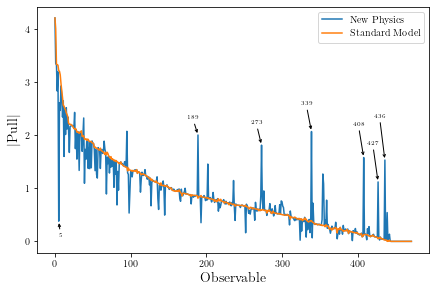

In [90]:
compare_plot(scVII, '../../ellipses/scVII.yaml', '../../plots/pullsVII')

In [2]:
SMEFT19.comparepulls.compare(scVII, '../../ellipses/scVII.yaml', '../../TeX/pullsVII' )